In [2]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

In [3]:
# Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# database path to Resources file
hawaii_db_path = "Resources/hawaii.sqlite"

# Create engine to connect to sqlite
engine = create_engine(f"sqlite:///{hawaii_db_path}")
conn = engine.connect()

In [5]:
# use inspector to find table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# use inspector to get column names and their type of data for measurement
columns = inspector.get_columns('measurement')
for column in columns:
 print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# use inspector to get column names and their type of data for station
columns = inspector.get_columns('station')
for column in columns:
 print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model using automap
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [9]:
# We can view all of the classes that automap found (same result as inspector, but different way)
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table using automap
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# display first row's columns and data in dictionary format for Measurement (same as inspector for column headers)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x251eaa13bb0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [13]:
# display first row's columns and data in dictionary format for Station (same as inspector for column headers)
session = Session(engine)
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x251eaa38070>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

In [14]:
# python query first 5 rows of Measurement table to view data
for row in session.query(Measurement.tobs, Measurement.date, Measurement.station, Measurement.prcp, Measurement.id).limit(5).all():
    print(row)

(65.0, '2010-01-01', 'USC00519397', 0.08, 1)
(63.0, '2010-01-02', 'USC00519397', 0.0, 2)
(74.0, '2010-01-03', 'USC00519397', 0.0, 3)
(76.0, '2010-01-04', 'USC00519397', 0.0, 4)
(73.0, '2010-01-06', 'USC00519397', None, 5)


In [15]:
# python query first 5 rows of Station table to view data
for row in session.query(Station.id, Station.elevation, Station.station, Station.name, Station.latitude, Station.longitude).limit(5).all():
    print(row)

(1, 3.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168)
(2, 14.6, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015)
(3, 7.0, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374)
(4, 11.9, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751)
(5, 306.6, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111)


In [16]:
# use SQL query for first 5 rows of Measurement table to view data
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [17]:
# use SQL query for first 5 rows of Station table to view data
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [18]:
# use.count to count the number of dates
date_count = session.query(func.count(Measurement.date)).all()
print(f" There are {date_count[0]} dates with recorded data.")

 There are (19550,) dates with recorded data.


In [19]:
# create query for earliest and latest date recorded
earliestDate = session.query(Measurement.date).order_by(Measurement.date).first()
latestDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The earliest date recorded: {earliestDate[0]}")
print(f"The latest date recorded: {latestDate[0]}")

The earliest date recorded: 2010-01-01
The latest date recorded: 2017-08-23


In [20]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
latestdate = dt.datetime.strptime(latestDate[0], '%Y-%m-%d')
querydate = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
querydate

sel = [Measurement.date,Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= querydate).all()

precipitation = pd.DataFrame(queryresult, columns=['Date','Precipitation'])
precipitation = precipitation.dropna(how='any') # clean up non value entries
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation = precipitation.set_index("Date")
precipitation.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


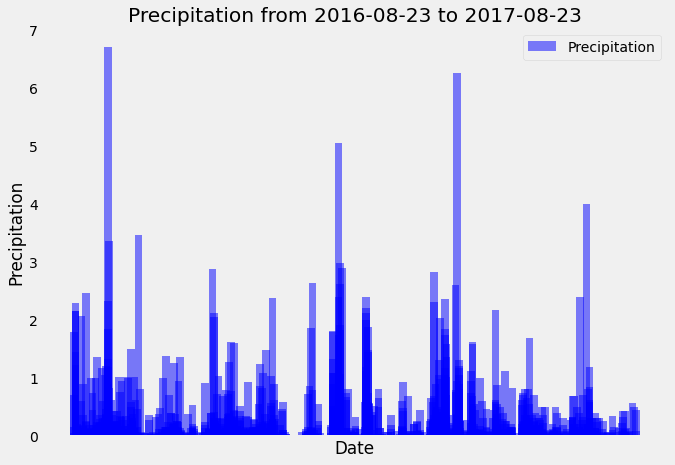

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

xx = precipitation.index.tolist()
yy = precipitation['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(xx,yy,width = 5 ,color='b', alpha=0.5, align="center", label='Precipitation')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,              
    labelbottom=False) 
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks)

plt.title(f"Precipitation from {querydate} to {latestDate[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.savefig('Images/histogram')
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()
print(f"There are {station_count} stations")

There are 9 stations


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station,func.count(Measurement.id)]
activestations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
mostactivestationdata = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
mostactivestationdata

(54.0, 85.0, 71.66378066378067)

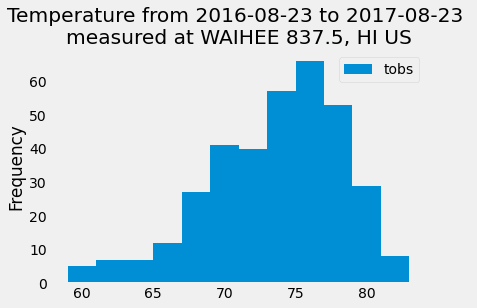

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
queryresult = session.query(Measurement.tobs).\
    filter(Measurement.station == activestations[0][0]).\
    filter(Measurement.date >= querydate).all()
temperatures = list(np.ravel(queryresult))

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*sel).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

stationname = stations_desc.loc[stations_desc["Station"] == activestations[0][0],"Name"].tolist()[0]

# n, bins, patches = plt.hist(temperatures, bins=12,alpha=0.7, rwidth=1.0,label='tobs')
plt.hist(temperatures, bins=12,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.75)
plt.ylabel('Frequency')
plt.title(f"Temperature from {querydate} to {latestDate[0]} \nmeasured at {stationname}")
plt.savefig('images/histogram2')
plt.legend()